<a href="https://colab.research.google.com/github/Pamela-YC-Cheng/Analytics-Project/blob/main/Winequality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset source: UCI machine learning repository
https://archive.ics.uci.edu/dataset/186/wine+quality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
df = pd.read_csv("/Users/pamelacheng/Downloads/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Understand the data- EDA

In [ ]:
df.shape

(1599, 12)

In [ ]:
null_rows = df[df.isnull().any(axis=1)]
has_null_rows = not null_rows.empty

has_null_rows

False

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x600 with 0 Axes>

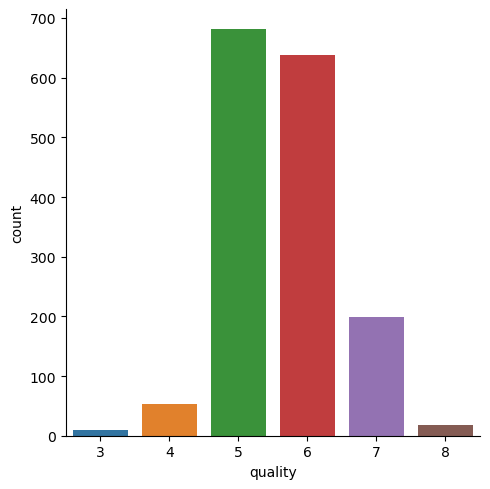

In [ ]:
plt.figure(figsize=(5,6))
sns.catplot(x='quality', data=df, kind='count')

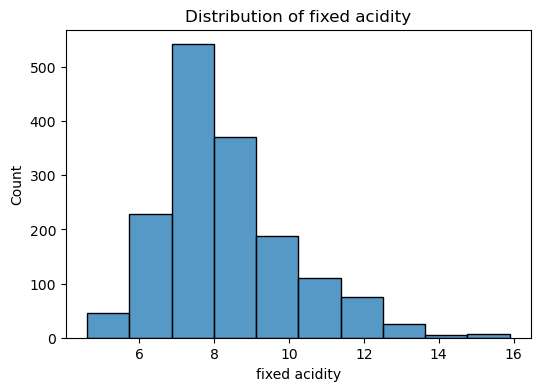

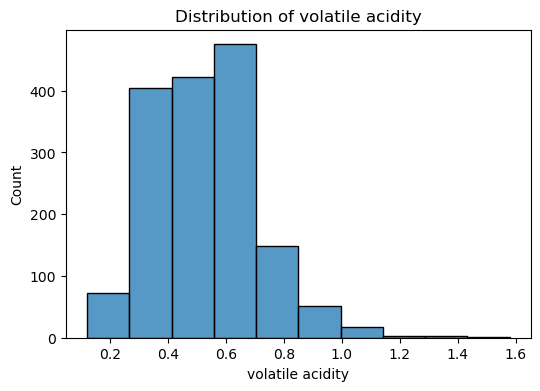

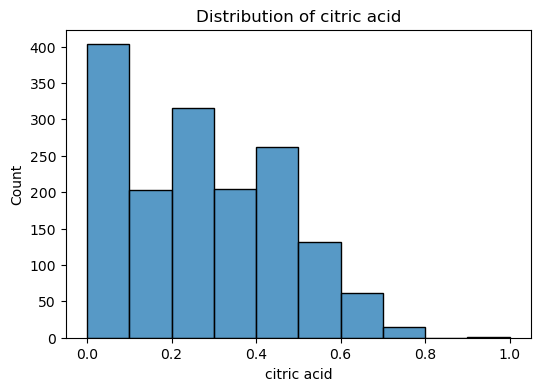

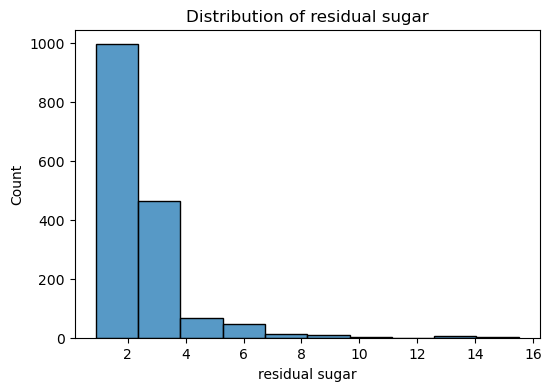

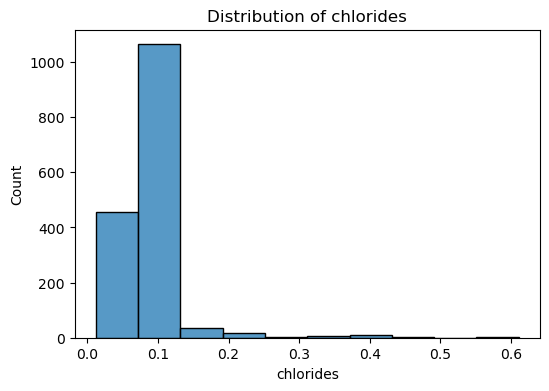

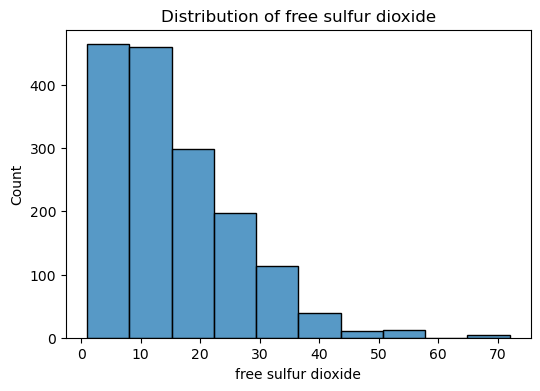

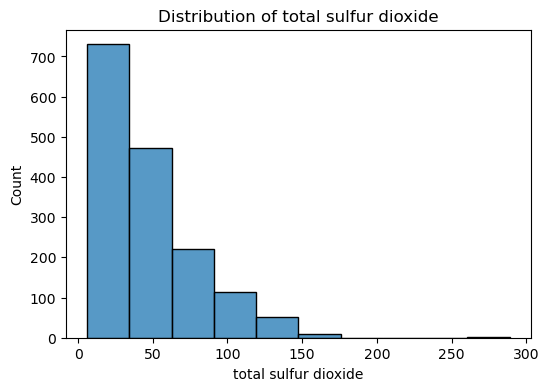

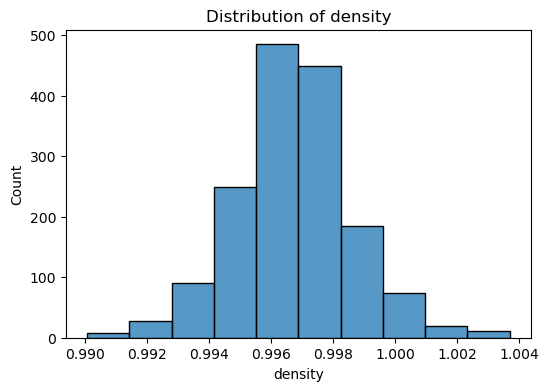

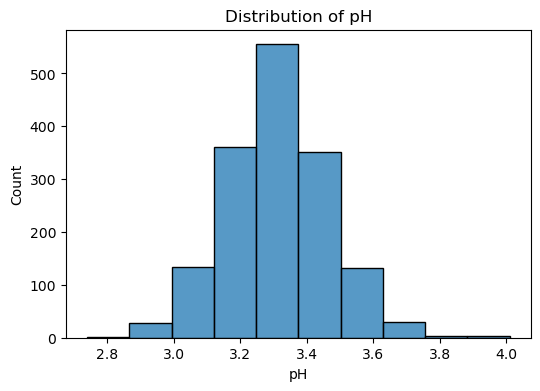

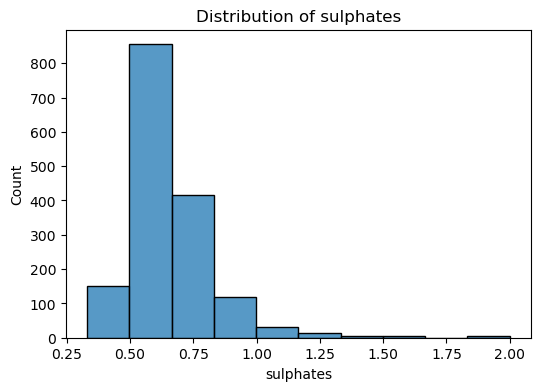

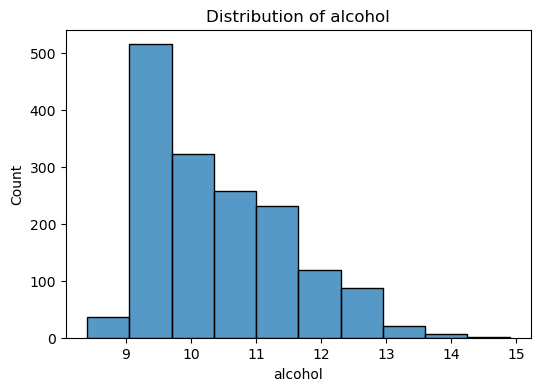

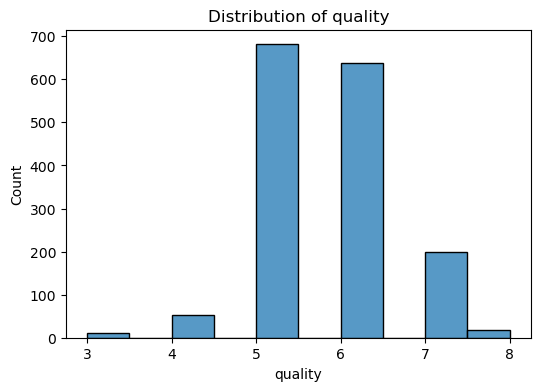

In [ ]:
cols = df.columns

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=10, kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

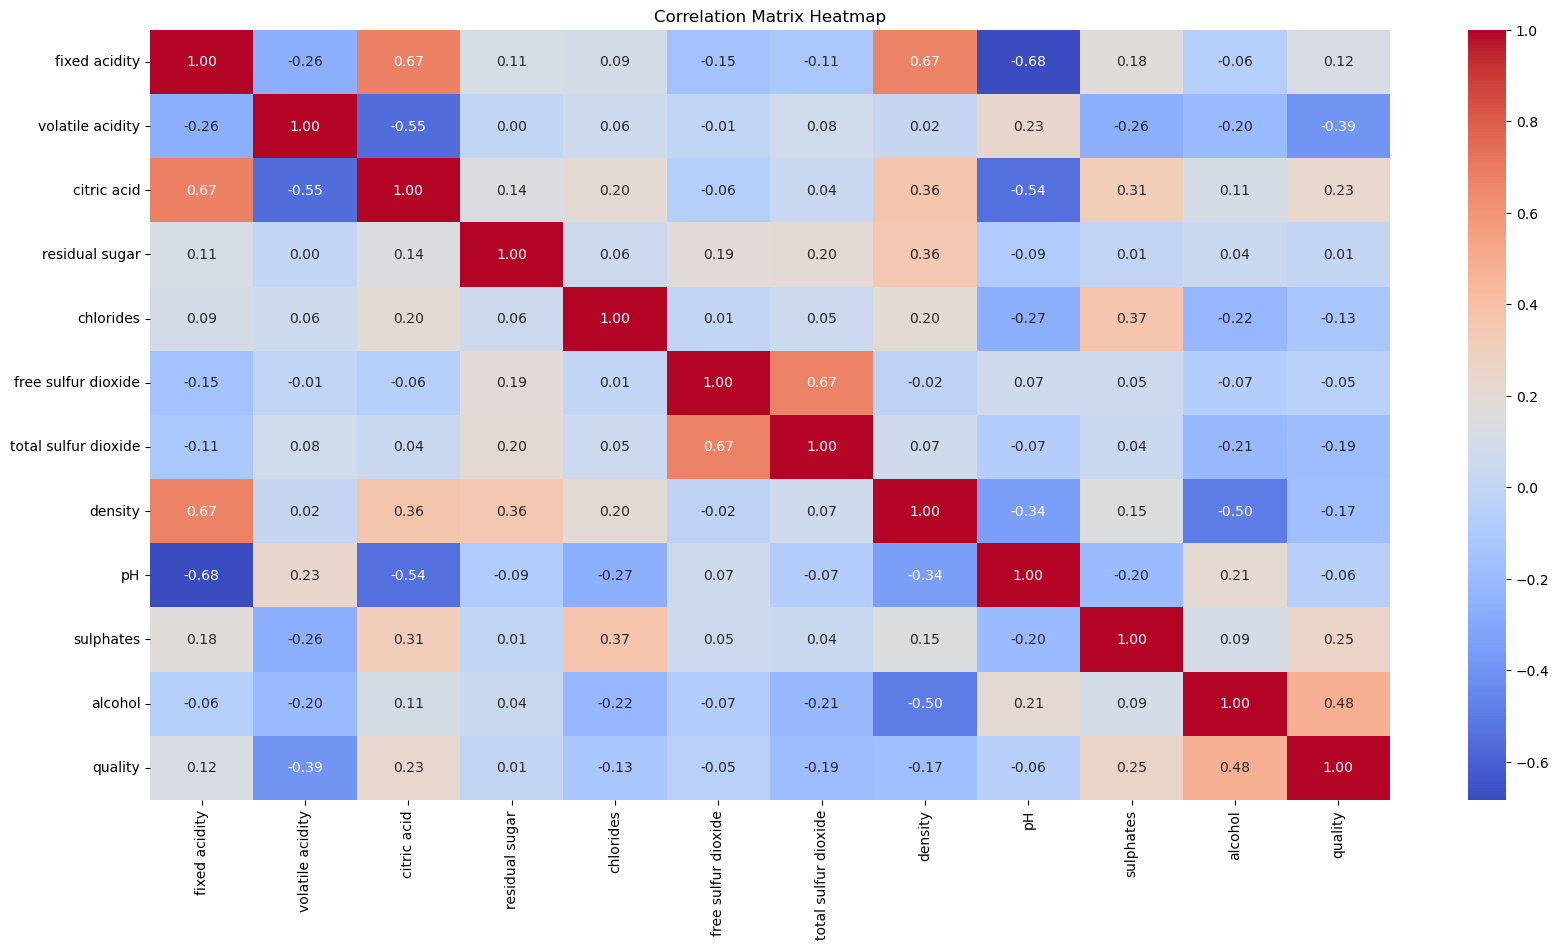

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix Heatmap')

In [ ]:
X = df.iloc[:,:11]
y=df.iloc[:,11]

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
# Convert the 'quality' column to binary values
df['quality'] = df['quality'].apply(lambda x: 1 if x < 6 else 0)

# Display the first few rows of the modified dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x600 with 0 Axes>

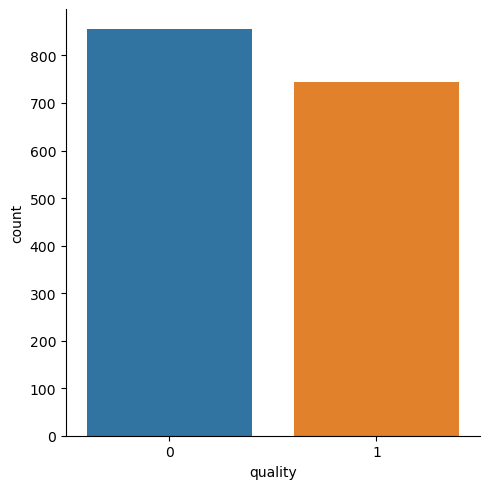

In [ ]:
# Converting quality to 'good' wine (>=6), 'bad' wine (<6)
plt.figure(figsize=(5,6))
sns.catplot(x='quality', data=df, kind='count')

In [ ]:
# reassign new quality to y (target variable)
y=df.iloc[:,11]
y

0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Assume X and y are defined somewhere
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define k-NN model
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', n_jobs=-1, weights='uniform')
knn.fit(X_train_scaled, y_train)

# Evaluate the Model
y_pred = knn.predict(X_test_scaled)
y_pred_insample = knn.predict(X_train_scaled)

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Cross-validation with 10 folds
# Use a pipeline to ensure scaling is done within each fold
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', n_jobs=-1, weights='uniform'))
])

scores = cross_val_score(pipeline, X=X, y=y, cv=10, scoring='f1_macro')
print("Cross Validation F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


F1 score (out-of-sample):  0.7190243902439024
F1 score (in-sample)    :  0.8146266381024068
Cross Validation F1: 0.66 (+/- 0.09)


In [ ]:
# Create Acidity Ratio
# Business Insight: This ratio could indicate the stability and quality of the wine. A higher ratio might suggest a better aging process and a more balanced taste, which could be a selling point.
df['Acidity_Ratio'] = df['fixed acidity'] / df['volatile acidity']

# Create Sweetness Level
# Business Insight: The level of perceived sweetness in wine can be a significant factor for consumer preference. This feature could help in segmenting wines based on their sweetness profile, allowing targeted marketing.
df['Sweetness_Level'] = df['residual sugar'] - df['fixed acidity']

# Create Sulfur Efficiency
# Business Insight: This ratio could indicate how efficiently sulfur dioxide is being used in the wine. A higher ratio may suggest that less total sulfur dioxide is needed for the same preservative effect, which could be a selling point for health-conscious consumers.
df['Sulfur_Efficiency'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

# Show the first few rows of the updated DataFrame
df.head()


X_FE = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol', 'Acidity_Ratio',
            'Sweetness_Level', 'Sulfur_Efficiency']]

In [ ]:
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
#Standardize
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(p=2,
                                     metric='minkowski'))
      ])

inner_cv = KFold(n_splits=10, shuffle=True)
outer_cv = KFold(n_splits=10, shuffle=True)

#Specify param to optimize
params = {
        'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
        'knn__weights': ['uniform', 'distance']
    }

knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=4)

knn = knn.fit(X_FE,y)
# Print best hyperparameters and score from GridSearchCV
print("\nParameter Tuning")
print("Non-nested CV f1_macro:", knn.best_score_)
print("Optimal Parameter:", knn.best_params_)
print("Optimal Estimator:", knn.best_estimator_)

# Nested Cross-Validation
nested_score_knn = cross_val_score(knn, X=X_FE, y=y, cv=outer_cv, scoring='f1_macro')
print("Nested CV f1_macro:", nested_score_knn.mean(), " +/- ", nested_score_knn.std())

# Additional 10-fold Cross-Validation
cross_val_scores = cross_val_score(knn, X_FE, y, cv=10, scoring='f1_macro')
print("10-fold CV f1_macro:", cross_val_scores.mean())


Parameter Tuning
Non-nested CV f1_macro: 0.8020676635316896
Optimal Parameter: {'knn__n_neighbors': 17, 'knn__weights': 'distance'}
Optimal Estimator: Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=17, weights='distance'))])
Nested CV f1_macro: 0.8085551508633884  +/-  0.030635188381371557
10-fold CV f1_macro: 0.6872090541865946


In [ ]:
# Decison Tree Model
# Tree Regression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score

tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X_train_scaled, y_train)

y_train_pred = tree.predict(X_train_scaled)
y_test_pred = tree.predict(X_test_scaled)

f1_train = f1_score(y_train, y_train_pred, average='macro')  # 'macro' for multi-class. Use 'binary' for binary classification
f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f"F1 Score on Training Data: {f1_train}")
print(f"F1 Score on Test Data: {f1_test}")

#Cross-Validation with 10 folds
from sklearn.model_selection import cross_val_score

# Cross-validation with 10 folds
scores = cross_val_score(tree, X=X, y=y, cv=10,scoring='f1_macro')

print("Performance F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F1 Score on Training Data: 0.7330341096803006
F1 Score on Test Data: 0.6755555555555555
Performance F1: 0.67 (+/- 0.12)


In [ ]:
############################## Decision Tree Parameter Tuning ##############################
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

inner_cv = KFold(n_splits=10, shuffle=True)
outer_cv = KFold(n_splits=10, shuffle=True)

# Choosing optimal depth of the tree AND optimal splitting criterion
dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy'],
                               'min_samples_leaf':[1,2,3,4,5],
                               'min_samples_split':[2,3,4,5]}],
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=4)

dt = dt.fit(X_FE,y)
print("\n dt Parameter Tuning ")
print("Non-nested CV f1_macro: ", dt.best_score_)
print("Optimal Parameter: ", dt.best_params_)
print("Optimal Estimator: ", dt.best_estimator_)
nested_score_dt = cross_val_score(dt, X=X_FE, y=y, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_dt.mean(), " +/- ", nested_score_dt.std())


# DT cross validation
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()

# Perform 10-fold cross validation with F1 score as the scoring metric
cross_val_scores_dt = cross_val_score(dt, X_FE, y, cv=10, scoring='f1_macro')

cross_val_scores_dt
cross_val_scores_dt.mean()


 dt Parameter Tuning 
Non-nested CV f1_macro:  0.7616483035129045
Optimal Parameter:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Optimal Estimator:  DecisionTreeClassifier(min_samples_split=3, random_state=42)
Nested CV f1_macro:  0.7481146868466796  +/-  0.023707809775808966


0.6330257720068199

In [ ]:
from sklearn.linear_model import LogisticRegression
# Define the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=50000)  # Increased max_iter for convergence

# Perform 10-fold cross validation with F1 score as the scoring metric
cross_val_scores_lr_10folds = cross_val_score(log_reg, X, y, cv=10, scoring='f1_macro')

cross_val_scores_lr_10folds
cross_val_scores_lr_10folds.mean()

0.7324808365307278

In [ ]:
############################ Logistic Regression Parameter Tuning ############################
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

inner_cv = KFold(n_splits=10, shuffle=True)
outer_cv = KFold(n_splits=10, shuffle=True)

lr = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='f1_macro',
                  cv=inner_cv)

lr = lr.fit(X,y)
print("\n Parameter Tuning ")
print("Non-nested CV f1_macro: ", lr.best_score_)
print("Optimal Parameter: ", lr.best_params_)
print("Optimal Estimator: ", lr.best_estimator_)
nested_score_lr = cross_val_score(lr, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro:",nested_score_lr.mean(), " +/- ", nested_score_lr.std())


log_reg = LogisticRegression(max_iter=50000)  # Increased max_iter for convergence

# Perform 10-fold cross validation with F1 score as the scoring metric
cross_val_scores_lr = cross_val_score(log_reg, X, y, cv=10, scoring='f1_macro')

cross_val_scores_lr
cross_val_scores_lr.mean()


 Parameter Tuning 
Non-nested CV f1_macro:  0.7417221076599636
Optimal Parameter:  {'C': 1000, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1000, random_state=42, solver='liblinear')
Nested CV f1_macro: 0.7416565655376435  +/-  0.03657970794131166


0.7324808365307278

10-fold cross validation:

F1-Score: 0.73 (+/- 0.06) [Logistic regression]


/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

F1-Score: 0.64 (+/- 0.07) [Decision tree]
F1-Score: 0.66 (+/- 0.04) [kNN]


/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


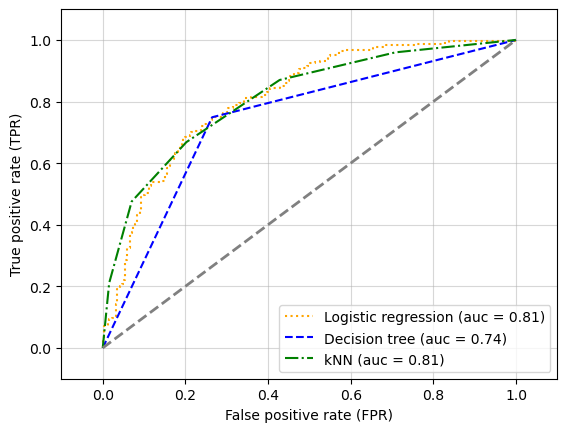

In [ ]:
#ROC Curve for Decision tree, k-NN, and logistic Regression #
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

clf1 = LogisticRegression()

# Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier()

# kNN Classifier

clf3 = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier())])

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]


print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='f1_macro')
    print("F1-Score: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

# Visualization

colors = [ 'orange', 'blue', 'green']      # colors for visualization

linestyles = [':', '--', '-.', '-']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # make predictions based on the classifiers

    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC)
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [ ]:
# Before feature engineering

results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'Decision Tree'],
    'Nested Cross-Validation F1-Score': [0.7403,0.8018, 0.7465]})

result_df = results.sort_values(by='Nested Cross-Validation F1-Score', ascending=False)
result_df = result_df.set_index('Nested Cross-Validation F1-Score')
result_df

,Model
Nested Cross-Validation F1-Score,
0.8018,KNN
0.7465,Decision Tree
0.7403,Logistic Regression


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, KFold

# Initialize LabelEncoder and encode the target variable
le = LabelEncoder()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_FE, y, test_size=0.3, random_state=42, stratify=y_encoded)

# K-NN Classifier
knn_clf = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=13, weights='distance'))
      ])

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=None,
                                  min_samples_leaf=1, min_samples_split=3, random_state=42)

# Logistic Regression Classifier
logistic_clf = LogisticRegression(penalty='l2', C=10000000, random_state=42, solver='liblinear')

# List of classifiers
classifiers = [knn_clf, tree_clf, logistic_clf]
clf_labels = ['K-NN', 'Decision Tree', 'Logistic Regression']

# Initialize KFold for nested cross-validation
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store the F1-scores and Nested CV scores for each classifier
f1_scores = {}
nested_cv_scores = {}

for clf, label in zip(classifiers, clf_labels):
    # Fit the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[label] = f1

    # Perform 5x5 nested cross-validation
    nested_score = cross_val_score(clf, X=X_FE, y=y_encoded, cv=outer_cv, scoring='f1_macro')
    nested_cv_scores[label] = nested_score.mean()

# Print F1-Scores
print('F1-Score:')
for model, score in f1_scores.items():
    print(f"{model}: {score:.4f}")

# Print Nested Cross-Validation F1-Scores
print('\nNested Cross-Validation F1-Score:')
for model, score in nested_cv_scores.items():
    print(f"{model}: {score:.4f}")

NameError: name 'y_encoded' is not defined

In [ ]:
import warnings
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
#Standardize
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(p=2,
                                     metric='minkowski'))
      ])

inner_cv = KFold(n_splits=10, shuffle=True)
outer_cv = KFold(n_splits=10, shuffle=True)

#Specify param to optimize
params = {
        'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
        'knn__weights': ['uniform', 'distance']
    }

knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=4)

knn = knn.fit(X_FE,y)
# Print best hyperparameters and score from GridSearchCV
print("\nParameter Tuning")
print("Non-nested CV f1_macro:", knn.best_score_)
print("Optimal Parameter:", knn.best_params_)
print("Optimal Estimator:", knn.best_estimator_)

# Nested Cross-Validation
nested_score_knn = cross_val_score(knn, X=X_FE, y=y, cv=outer_cv, scoring='f1_macro')
print("Nested CV f1_macro:", nested_score_knn.mean(), " +/- ", nested_score_knn.std())

# Additional 10-fold Cross-Validation
cross_val_scores = cross_val_score(knn, X_FE, y, cv=10, scoring='f1_macro')
print("10-fold CV f1_macro:", cross_val_scores.mean())


Parameter Tuning
Non-nested CV f1_macro: 0.8156329901928805
Optimal Parameter: {'knn__n_neighbors': 21, 'knn__weights': 'distance'}
Optimal Estimator: Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=21, weights='distance'))])
Nested CV f1_macro: 0.8072077840243456  +/-  0.02388285734785965
10-fold CV f1_macro: 0.6903803967514643


10-fold cross validation:

F1-Score: 0.73 (+/- 0.06) [Logistic regression]


/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

F1-Score: 0.63 (+/- 0.07) [Decision tree]
F1-Score: 0.67 (+/- 0.06) [kNN]


/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


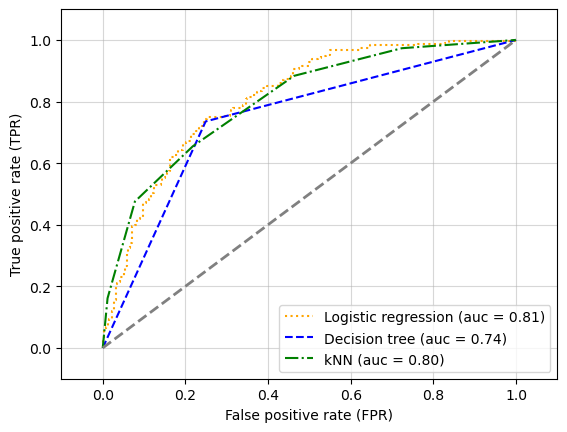

In [ ]:
#ROC Curve for Decision tree, k-NN, and logistic Regression #
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_FE, y, test_size=0.3, random_state=1, stratify=y)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



clf1 = LogisticRegression()


# Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier()

# kNN Classifier

clf3 = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier())
      ])

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]


print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X_FE,
                             y=y,
                             cv=10,
                             scoring='f1_macro')
    print("F1-Score: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

# Visualization

colors = [ 'orange', 'blue', 'green']      # colors for visualization

linestyles = [':', '--', '-.', '-']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # make predictions based on the classifiers

    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC)
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [ ]:
######################### Decreasing Linear Regression Model Complexity ########################


######################## Regularized Linear Regression Model - Lasso    ########################

from sklearn.linear_model import Lasso # lasso Regression class
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance
                                                 # the standard score of a sample x is calculated as: z = (x - u) / s
                                                 # where u is the mean of the training sample , and s is the standard deviation of the training sample.
                                                 # centering and scaling happens independently on each feature.

# Lasso Regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
lasso = Lasso(alpha=0.1)   # alpha : constant that multiplies the L1 term, controlling regularization strength
                           # the larger the value of alpha, the more aggressive the penalization is.
                           # alpha defaults to 1.0
                           # alpha = 0 is equivalent to an ordinary least square Linear Regression
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)         # computes the mean and std to be used for scaling and performs scaling
X_test = scaler.transform(X_test)               # performs standardization of test set X attributes by centering and scaling

lasso.fit(X_train, y_train)                     # fit model to data
y_train_pred = lasso.predict(X_train)           # apply model to train data
y_test_pred = lasso.predict(X_test)             # apply model to test data
print(lasso.coef_)                              # estimated coefficients for the lasso regression model


# Generate the index for features with 0 coefficient
lasso_coefficients = [-0., 0.04276391, -0., 0., 0., 0., 0., 0., -0., -0.00213395, -0.10669953]
#feature_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
#                 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
#                 'pH', 'sulphates', 'alcohol']


headers = df.columns[:11].tolist()
# Create a dictionary that maps feature names to their lasso coefficients
feature_coef_dict = dict(zip(headers, lasso_coefficients))

# Retrieve the feature names where the coefficient is 0
zero_coef_features = [feature for feature, coef in feature_coef_dict.items() if coef == 0]

zero_coef_features

[-0.          0.04276391 -0.          0.          0.          0.
  0.          0.         -0.         -0.00213395 -0.10669953 -0.
  0.         -0.        ]


['fixed acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH']

In [ ]:
X_FE_filtered = X_FE.drop(columns=[
    'fixed acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH'
])

X_FE_filtered

,volatile acidity,sulphates,alcohol,Acidity_Ratio,Sweetness_Level,Sulfur_Efficiency
0,0.700,0.56,9.4,10.571429,-5.5,0.323529
1,0.880,0.68,9.8,8.863636,-5.2,0.373134
2,0.760,0.65,9.8,10.263158,-5.5,0.277778
3,0.280,0.58,9.8,40.000000,-9.3,0.283333
4,0.700,0.56,9.4,10.571429,-5.5,0.323529
...,...,...,...,...,...,...
1594,0.600,0.58,10.5,10.333333,-4.2,0.727273
1595,0.550,0.76,11.2,10.727273,-3.7,0.764706
1596,0.510,0.75,11.0,12.352941,-4.0,0.725000
1597,0.645,0.71,10.2,9.147287,-3.9,0.727273


10-fold cross validation:

F1-Score: 0.73 (+/- 0.07) [Logistic regression]
F1-Score: 0.63 (+/- 0.05) [Decision tree]
F1-Score: 0.71 (+/- 0.07) [kNN]


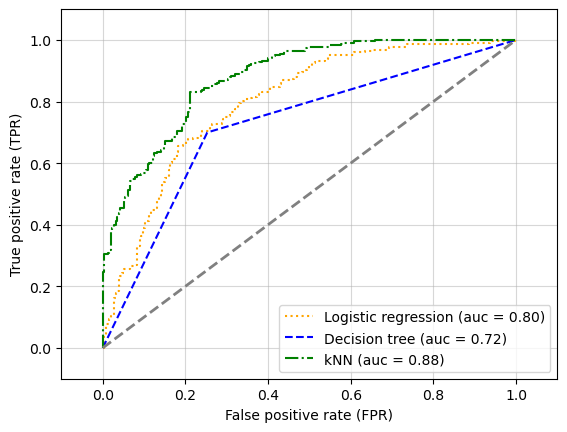

In [ ]:
#ROC Curve for Decision tree, k-NN, and logistic Regression #
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_FE_filtered, y, test_size=0.3, random_state=1, stratify=y)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



clf1 = LogisticRegression(penalty='l1',
                          C=1000,
                          random_state=42,
                          solver='liblinear')


# Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(criterion="gini",
                                  splitter="random",
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  random_state=42)

# kNN Classifier

clf3 = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=20,
                                     weights= 'distance'))
      ])

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]


print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X_FE_filtered,
                             y=y,
                             cv=10,
                             scoring='f1_macro')
    print("F1-Score: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

# Visualization

colors = [ 'orange', 'blue', 'green']      # colors for visualization

linestyles = [':', '--', '-.', '-']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # make predictions based on the classifiers

    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC)
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()